# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data=pd.merge(study_results, mouse_metadata, on=["Mouse ID"])

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [49]:
# Checking the number of mice.
number_of_mice=len(combined_data["Mouse ID"].unique())
number_of_mice

249

In [50]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#combined_data[["Mouse ID", "Timepoint"]].unique()
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [51]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_ids = combined_data.loc[combined_data["Mouse ID"] == "g989"]
duplicate_mice_ids

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [52]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#organized_data= combined_data.drop_duplicates(subset="id g989", keep="first")
#organized_data
#duplicate_mice_ids=combined_data["Mouse ID"!="g989"]
clean_study_data_complete = combined_data[combined_data['Mouse ID'].isin(duplicate_mice_ids)==False]
clean_study_data_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [53]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete["Mouse ID"].unique())


249

## Summary Statistics

In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped = clean_study_data_complete.groupby('Drug Regimen')
mean_data = grouped["Tumor Volume (mm3)"].mean()
median_data = grouped["Tumor Volume (mm3)"].median()
varience=grouped["Tumor Volume (mm3)"].var()
st_dev=grouped["Tumor Volume (mm3)"].std()
std_error=grouped["Tumor Volume (mm3)"].sem()
summary_statistics_df=pd.DataFrame({"Mean Tumor Volume":mean_data,
                                    "Median Tumor Volume":median_data,
                                    "Tumor Volume Variance":varience,
                                    "Tumor Volume Std.Dev.": st_dev,
                                    "Tumor Volume Std.Err.": std_error
                                    })
summary_statistics_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [56]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_agg_df = clean_study_data_complete.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics_agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

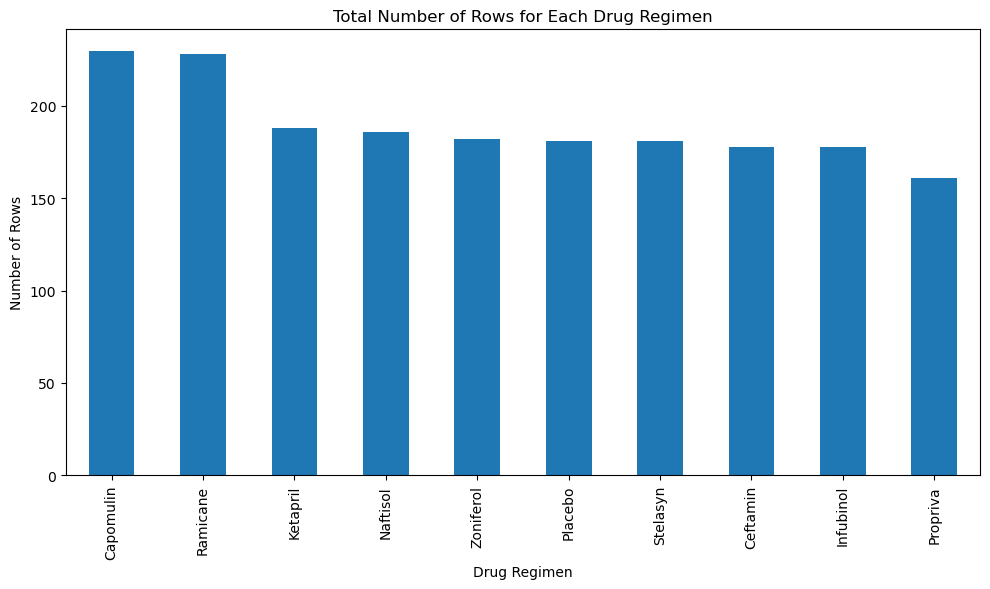

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_study_data_complete.groupby('Drug Regimen')['Mouse ID'].count()
#sort values
regimen_counts_sorted=regimen_counts.sort_values(ascending=False)
# Create a bar plot
regimen_counts_sorted.plot(kind='bar', figsize=(10, 6))

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')

# Display the plot
plt.tight_layout()
plt.show()

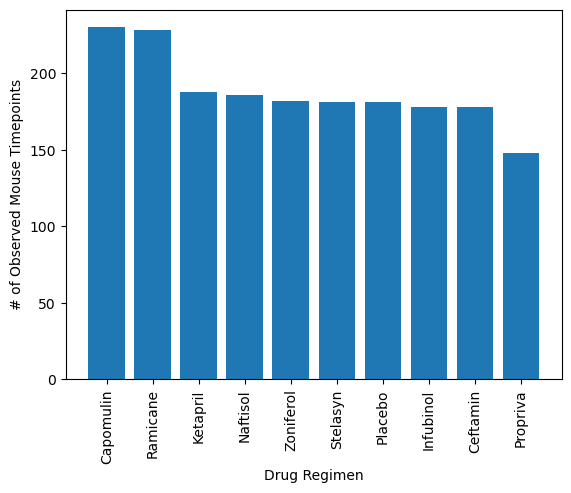

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


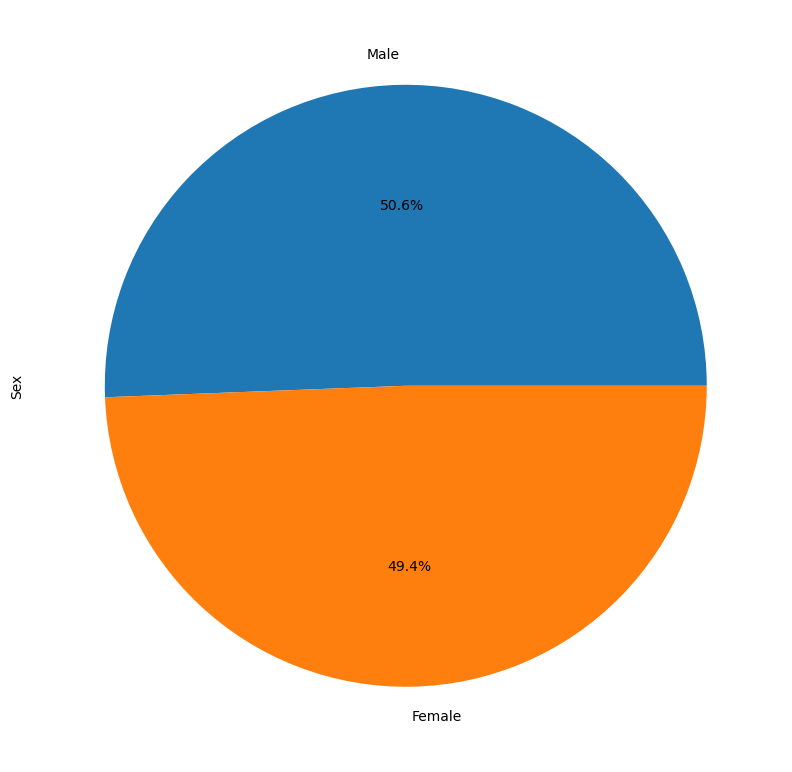

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = clean_study_data_complete['Sex'].value_counts()

# Create a pie plot
sex_counts.plot(kind='pie',autopct='%1.1f%%', figsize=(8, 8))



# Display the plot
plt.tight_layout()
plt.show()





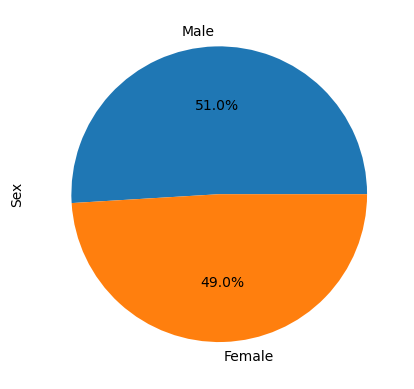

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# 1. Filter Data for the Four Regimens
four_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = clean_study_data_complete[clean_study_data_complete['Drug Regimen'].isin(four_regimens)]

# 2. Find the Last Timepoint for Each Mouse
last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max()

# 3. Merge with Original Data to Get Tumor Volume at the Last Timepoint
final_tumor_volume_data = pd.merge(
    last_timepoints,  # DataFrame with last timepoints
    clean_study_data_complete,  # Original DataFrame
    on=['Mouse ID', 'Timepoint'],  # Merge on Mouse ID and Timepoint
    how='inner'  # Use inner join to keep only matching rows
)

# Display the DataFrame with final tumor volume data
print(final_tumor_volume_data)


   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0      a203         45           67.973419                 2    Infubinol   
1      a251         45           65.525743                 1    Infubinol   
2      a275         45           62.999356                 3     Ceftamin   
3      a411         45           38.407618                 1     Ramicane   
4      a444         45           43.047543                 0     Ramicane   
..      ...        ...                 ...               ...          ...   
95     y769         45           68.594745                 4     Ceftamin   
96     y793         45           31.896238                 2    Capomulin   
97     y865         45           64.729837                 3     Ceftamin   
98     z578         45           30.638696                 0     Ramicane   
99     z581         45           62.754451                 3    Infubinol   

       Sex  Age_months  Weight (g)  
0   Female          20          23  
1

In [17]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


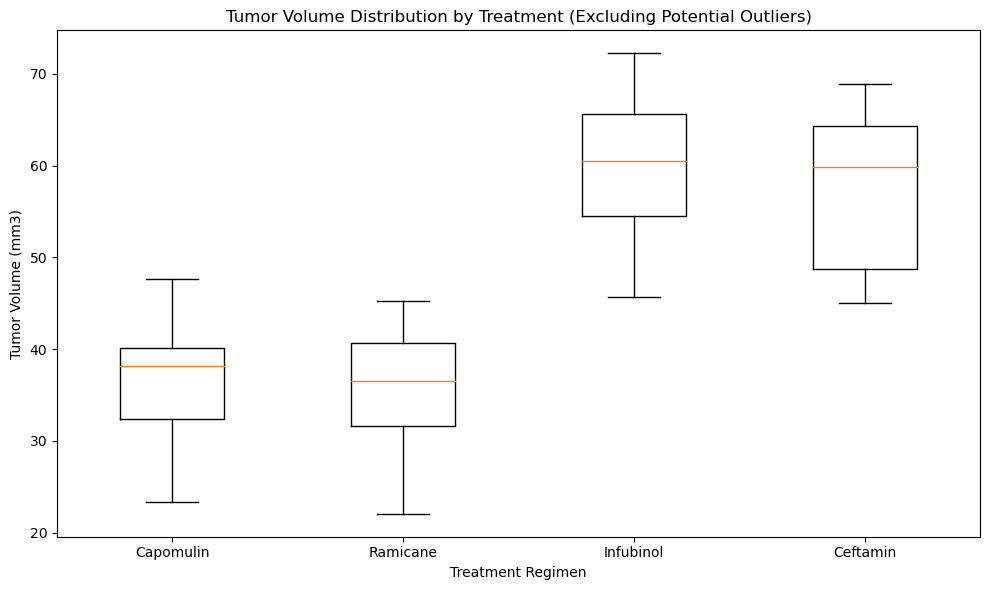

In [60]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


# Create a list of treatment regimen names
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty dictionary to store potential outliers
potential_outliers = {}

# Create an empty list to store tumor volume data for box plots
tumor_vol_data = []

# Iterate through each treatment in the list
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume_data.loc[final_tumor_volume_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Calculate the IQR for the current treatment
    quartiles = tumor_vol.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine the lower and upper bounds for potential outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Identify potential outliers
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Store potential outliers in the dictionary
    potential_outliers[treatment] = outliers
    
    # Append tumor volume data (excluding potential outliers) to the list for box plots
    tumor_vol_no_outliers = tumor_vol[(tumor_vol >= lower_bound) & (tumor_vol <= upper_bound)]
    tumor_vol_data.append(tumor_vol_no_outliers)

# Create box plots for each treatment group
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments, sym='r+')
plt.title('Tumor Volume Distribution by Treatment (Excluding Potential Outliers)')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.tight_layout()
plt.show()


## Line and Scatter Plots

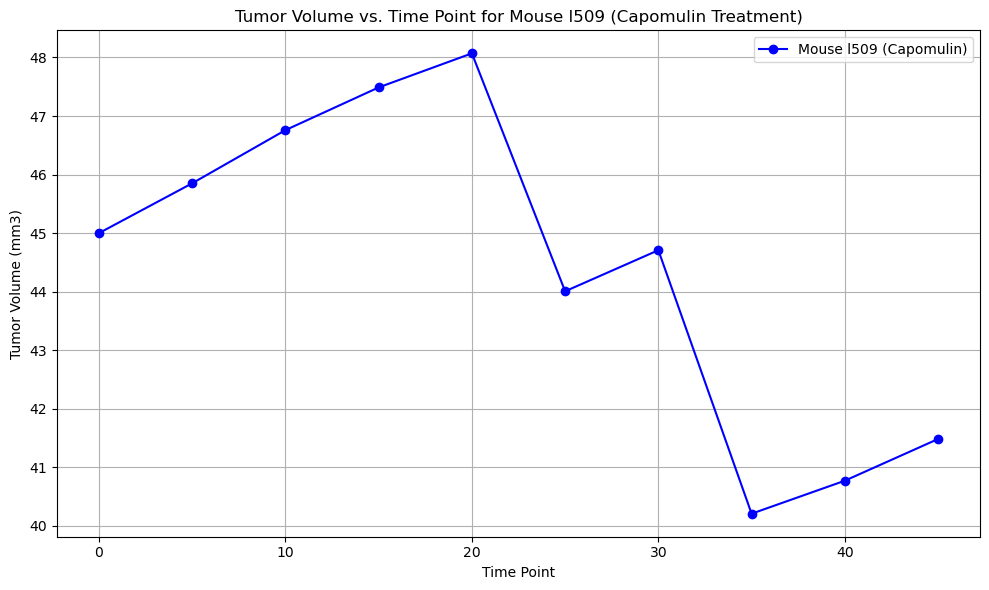

In [61]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


# Filter the data for mouse ID "I509" and Capomulin treatment
mouse_id = 'l509'
capomulin_data = clean_study_data_complete[
    (clean_study_data_complete['Mouse ID'] == mouse_id) & 
    (clean_study_data_complete['Drug Regimen'] == 'Capomulin')
]


plt.figure(figsize=(10, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b', label=f"Mouse {mouse_id} (Capomulin)")
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()  # Add a legend

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()




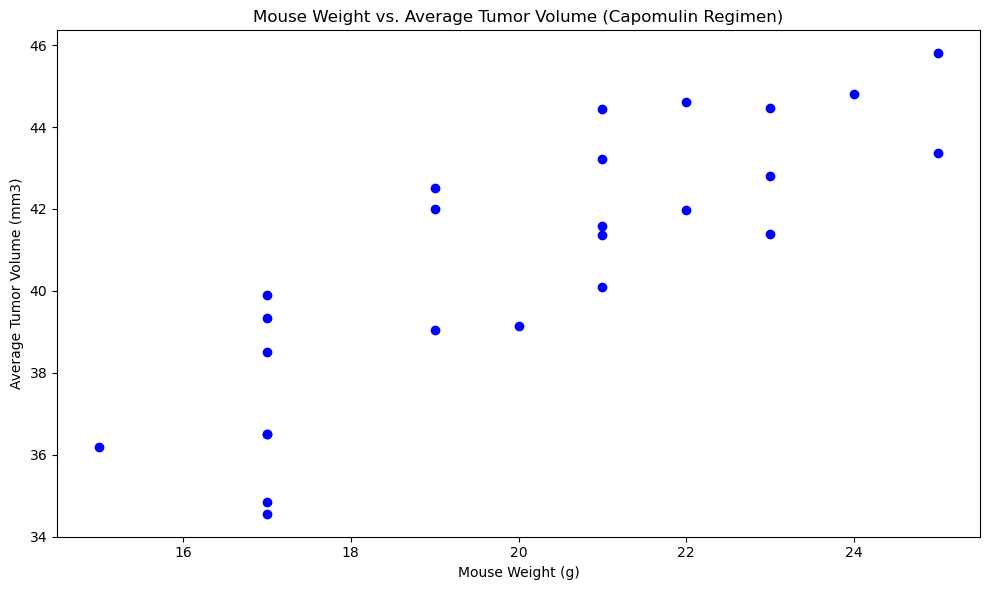

In [62]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


# Filter the data for the Capomulin regimen
capomulin_data = clean_study_data_complete[clean_study_data_complete['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse in Capomulin regimen
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
# Calculate the corresponding mouse weights
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='b')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot

plt.tight_layout()
plt.show()


## Correlation and Regression

Correlation Coefficient: 0.84


NameError: name 'linregress' is not defined

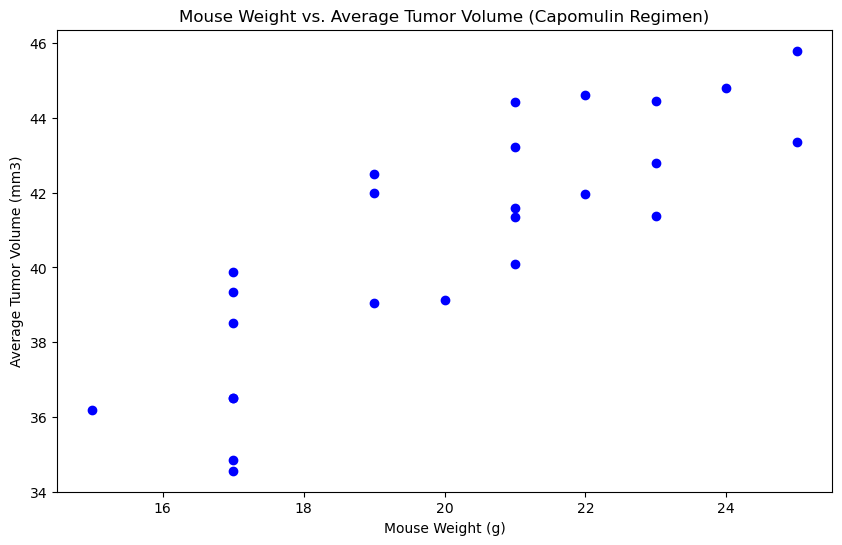

In [63]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen



# Filter the data for the Capomulin regimen
capomulin_data = clean_study_data_complete[clean_study_data_complete['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse in Capomulin regimen
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
# Calculate the corresponding mouse weights
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='b')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Calculate the correlation coefficient
correlation_coefficient = round(st.pearsonr(mouse_weights, average_tumor_volume)[0], 2)
print(f"Correlation Coefficient: {correlation_coefficient}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, average_tumor_volume)

# Calculate the predicted values using the linear regression model
predicted_values = slope * mouse_weights + intercept

# Add the linear regression line to the scatter plot
plt.plot(mouse_weights, predicted_values, color='red', linestyle='--', label=f'Linear Regression (R-squared = {r_value**2:.2f})')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()
